In [2]:
#packages
import pandas as pd
import csv
import matplotlib as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import glob
import pycountry
from datetime import datetime

#chaning the number of columns that are displayed. get will tell you how much. 
pd.set_option("display.max_columns",50)
sns.set_style("whitegrid")

pd.options.mode.chained_assignment = None

# Life Time Campaign Level

In [3]:
#CLEANING

#importing Data
df_ltc=pd.read_excel("LT_C.xlsx")

#dropping unused columns
df_ltc.drop(columns=["id","status","business_name","iso_code","manager_name","ad_set_manager_id","client",
                     "client_id","ap_campaign_id","ad_set_campaign_group_id","notification_stop_spend","notification_stop_spend_threshold",
                    "revenue_multiplier","Rejection rate","margin_percentage","currency","facebook_business_id",
                    "maxleads","countryIso","url"], inplace=True)

#1. FIX CTR
def foo(x):
    if x["ctr"] >= 1:
        return(x["ctr"]/10000)
    else:
        return(x["ctr"])
df_ltc["ctr"] = df_ltc.apply(foo, axis=1)
df_ltc["ctr"] = df_ltc["ctr"].round(2)

#2. FIX CPC
def roo(x):
    if x["cpc"] >= 1 and x["cpc"] < 1000000:
        return(x["cpc"]/100000)
    if x["cpc"] >= 1000000:
        return(x["cpc"]/1000000)
    else:
        return(x["cpc"])
df_ltc["cpc"] = df_ltc.apply(roo, axis=1)
df_ltc["cpc"] = df_ltc["cpc"].round(2)

#3. FIX CPM
def coo(x):
    if x["cpm"] >= 1:
        return(x["cpm"]/1000000)
    else:
        return(x["cpm"])
df_ltc["cpm"] = df_ltc.apply(coo, axis=1)
df_ltc["cpm"] = df_ltc["cpm"].round(2)

#4. FIX CR
df_ltc["cr"] = df_ltc["cr"]/10000
df_ltc["cr"] = df_ltc["cr"].round(2)

#5. FIX CPA
def too(x):
    if x["cpa"] >= 1:
        return(x["cpa"]/1000000)
    else:
        return(x["cpa"])
df_ltc["cpa"] = df_ltc.apply(too, axis=1)
df_ltc["cpa"] = df_ltc["cpa"].round(2)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_ltc["marginP"] = df_ltc.apply(woo, axis=1)
df_ltc["marginP"] = df_ltc["marginP"].round(2)

#dropping first 4 rows, since they have no spend (and very small values)
df_ltc.drop([0,1,2,3],inplace=True)

## Most successful campaigns

### Margin %

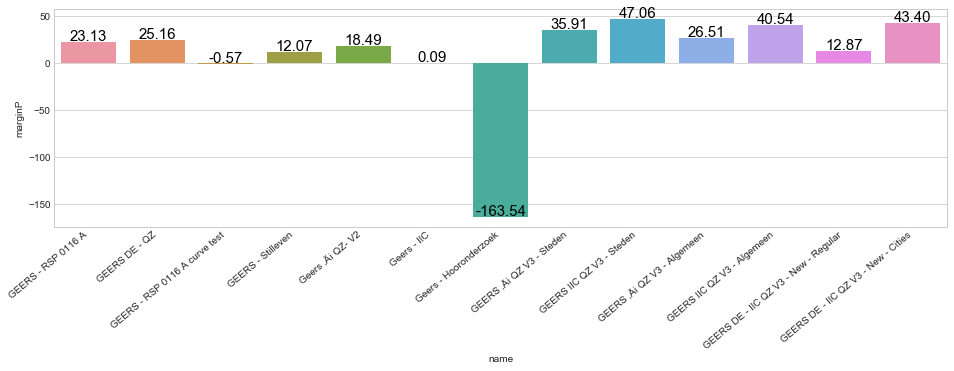

In [4]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="marginP", data=df_ltc)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")        

### CTR

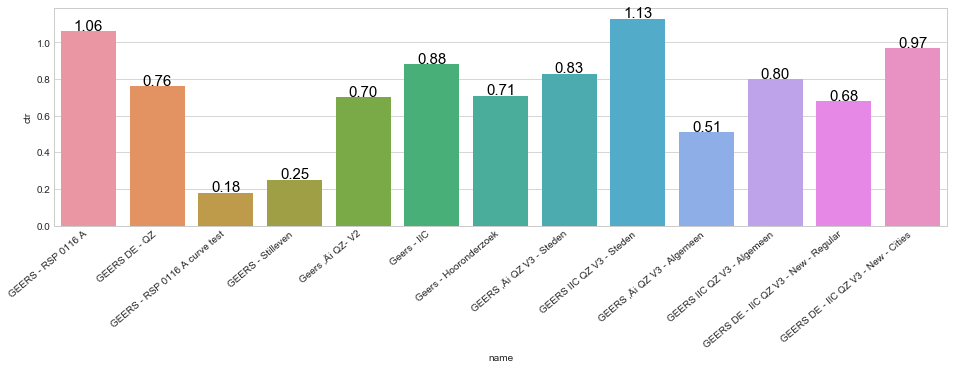

In [5]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="ctr", data=df_ltc)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

### CPM

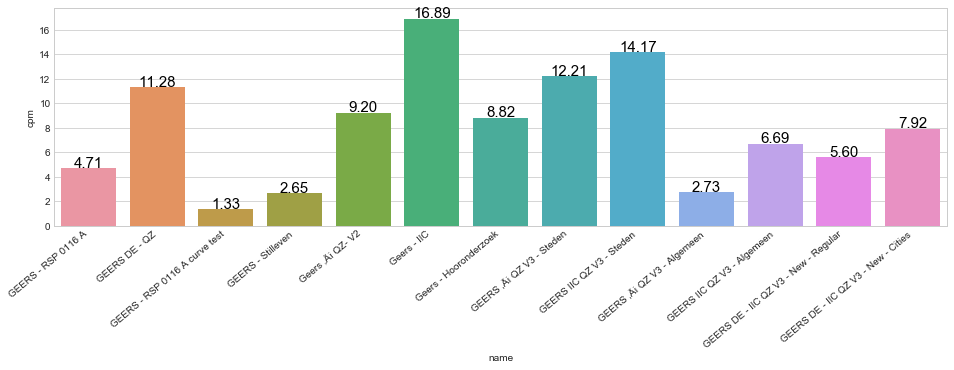

In [6]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="cpm", data=df_ltc)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

### CR

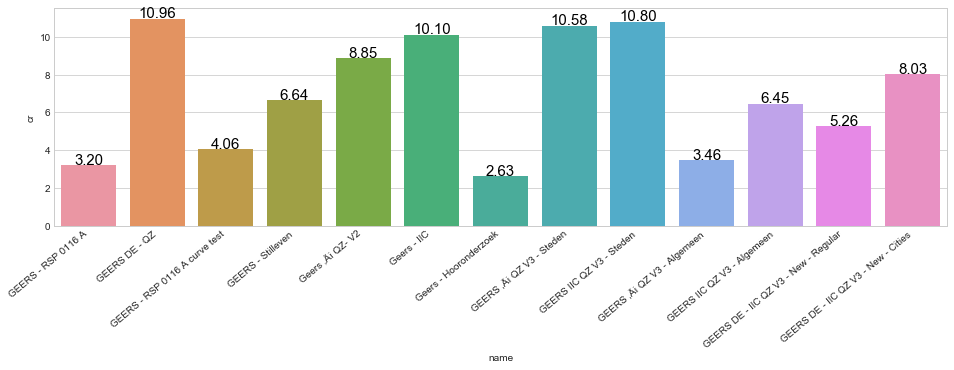

In [7]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="cr", data=df_ltc)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

### Leads

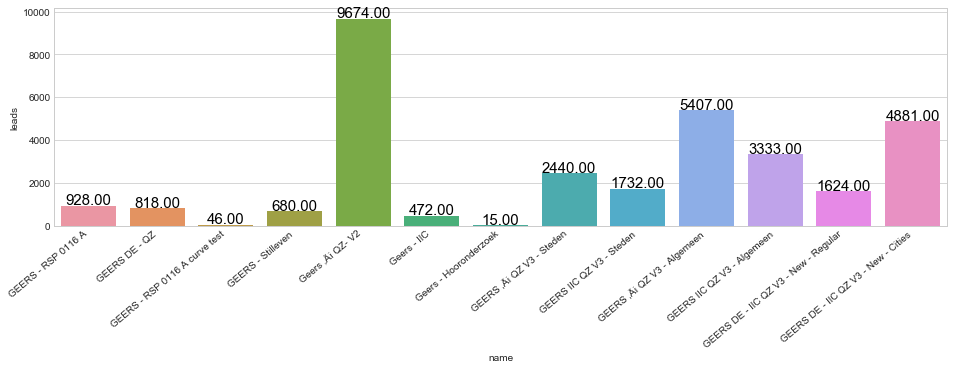

In [8]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="leads", data=df_ltc)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

In [9]:
df_ltc

,name,leads,revenue,purchase,margin,ctr,cpc,cpm,cr,cpa,marginP,clicks,views
4,GEERS - RSP 0116 A,928,16704.0,12840.77,3863.23,1.06,0.44,4.71,3.20,13.84,23.13,29002,2726473
5,GEERS DE - QZ,818,14724.0,11020.14,3703.86,0.76,1.48,11.28,10.96,13.47,25.16,7461,976737
6,GEERS - RSP 0116 A curve test,46,828.0,832.72,-4.72,0.18,0.74,1.33,4.06,18.10,-0.57,1132,623945
7,GEERS - Stilleven,680,12240.0,10762.86,1477.14,0.25,1.05,2.65,6.64,15.83,12.07,10242,4063822
8,Geers ‚Äì QZ- V2,9674,175572.0,143115.90,32456.10,0.70,1.31,9.20,8.85,14.79,18.49,109261,15553029
9,Geers - IIC,472,8982.0,8974.09,7.91,0.88,1.92,16.89,10.10,19.01,0.09,4672,531422
10,Geers - Hooronderzoek,15,270.0,711.56,-441.56,0.71,1.25,8.82,2.63,47.44,-163.54,571,80714
11,GEERS ‚Äì QZ V3 - Steden,2440,52995.0,33966.44,19028.56,0.83,1.47,12.21,10.58,13.92,35.91,23072,2782743
12,GEERS IIC QZ V3 - Steden,1732,37848.0,20037.81,17810.19,1.13,1.25,14.17,10.80,11.57,47.06,16041,1414580
13,GEERS ‚Äì QZ V3 - Algemeen,5407,112803.0,82896.39,29906.61,0.51,0.53,2.73,3.46,15.33,26.51,156426,30407175


_______

# Life Time Ad Set Level

In [10]:
#import data
df_lta=pd.read_excel("LT_A.xlsx")

#dropping unused columns
df_lta.drop(columns=["id","ad_set_campaign_id","status","margin_percentage","currency","facebook_business_id",
                     "real_budget","revenue_type","facebook_ad_set_id","facebook_ad_account_id","start_date",
                     "end_date","short_url","ad_url_domain_id","url"], inplace=True)

#1. FIX CTR
def foo(x):
    if x["ctr"] >= 1:
        return(x["ctr"]/10000)
    else:
        return(x["ctr"])
df_lta["ctr"] = df_lta.apply(foo, axis=1)
df_lta["ctr"] = df_lta["ctr"].round(2)

#2. FIX CPC
def roo(x):
    if x["cpc"] >= 1 and x["cpc"] < 1000000:
        return(x["cpc"]/100000)
    if x["cpc"] >= 1000000:
        return(x["cpc"]/1000000)
    else:
        return(x["cpc"])
df_lta["cpc"] = df_lta.apply(roo, axis=1)
df_lta["cpc"] = df_lta["cpc"].round(2)

#3. FIX CPM
def coo(x):
    if x["cpm"] >= 1:
        return(x["cpm"]/1000000)
    else:
        return(x["cpm"])
df_lta["cpm"] = df_lta.apply(coo, axis=1)
df_lta["cpm"] = df_lta["cpm"].round(2)

#4. FIX CR
df_lta["cr"] = df_lta["cr"]/10000
df_lta["cr"] = df_lta["cr"].round(2)

#5. FIX CPA
def too(x):
    if x["cpa"] >= 1:
        return(x["cpa"]/1000000)
    else:
        return(x["cpa"])
df_lta["cpa"] = df_lta.apply(too, axis=1)
df_lta["cpa"] = df_lta["cpa"].round(2)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_lta["marginP"] = df_lta.apply(woo, axis=1)
df_lta["marginP"] = df_lta["marginP"].round(2)

Ads with the highest margin

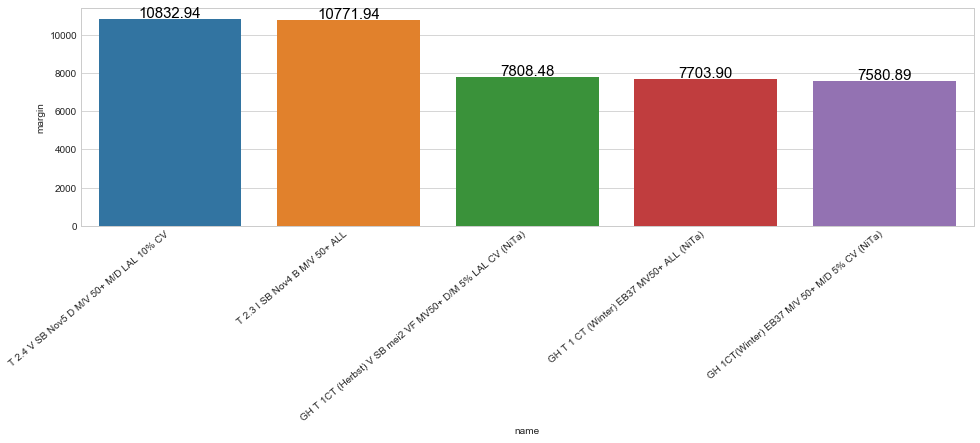

In [11]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="margin", data=df_lta.nlargest(5,'margin'))
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

Top 5 ads with margins over 50%

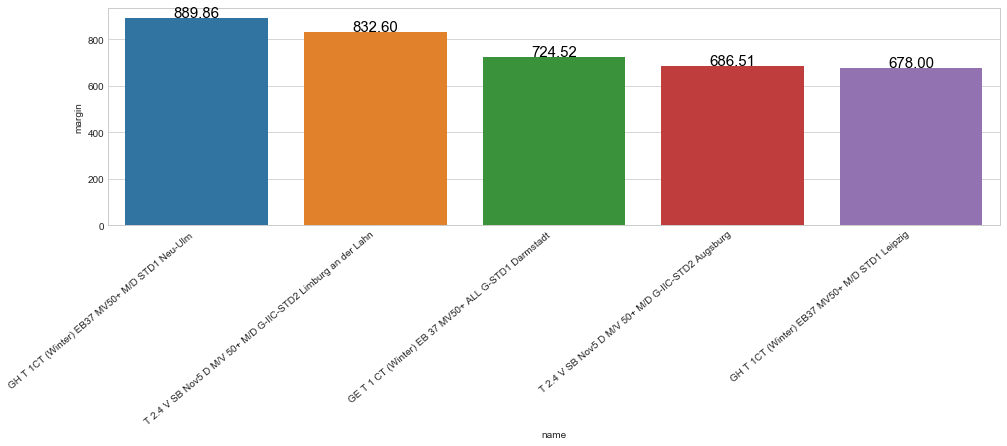

In [12]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="margin", data=df_lta.loc[df_lta["marginP"]>=50].nlargest(5,'margin'))
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

Might be interesting to note here, that none of the ads with a margin of more than 50% made over €1000 

When we lower the margin to 40%:

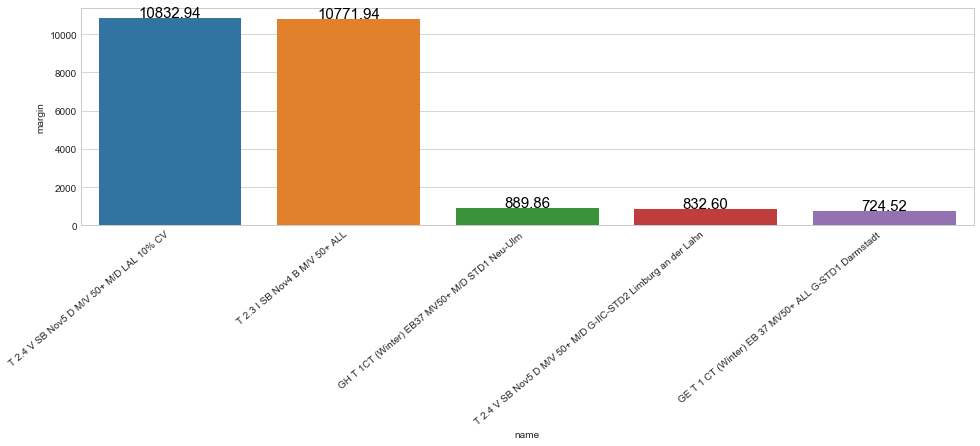

In [13]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="margin", data=df_lta.loc[df_lta["marginP"]>=40].nlargest(5,'margin'))
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

Budgets

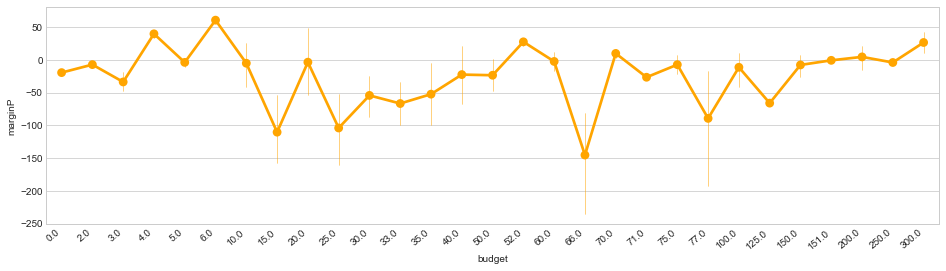

In [14]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="budget", y="marginP", color="orange", errwidth=.5, data=df_lta)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [15]:
len(df_lta.loc[df_lta["budget"]==20])

6

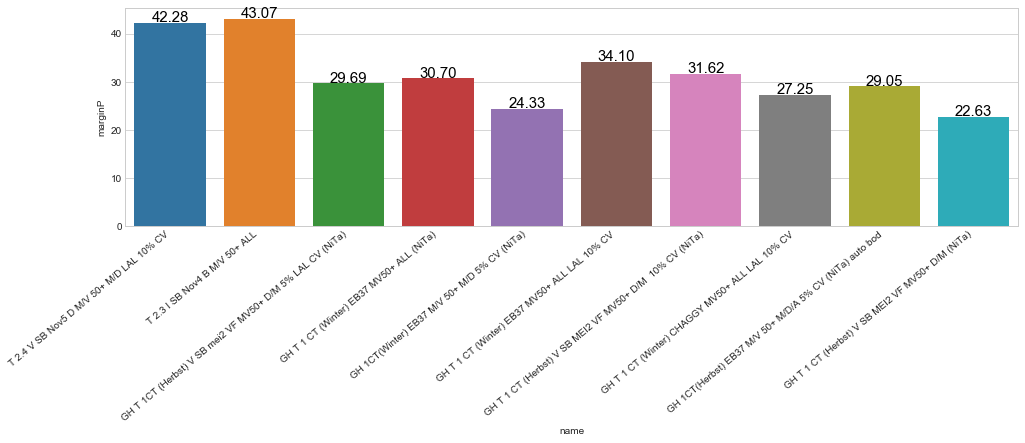

In [16]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.barplot(x="name", y="marginP", data=df_lta.nlargest(10,'margin'))
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
for p in ha.patches:
             ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="center", fontsize=15, color="black", xytext=(0, 5),
                 textcoords="offset points")

In [17]:
df_lta

,tag,campaign_name,name,budget,relevance_score,leads,revenue,purchase,margin,ctr,cpc,cpm,cr,cpa,insert_time,frequency,marginP,views,clicks
0,SB000000000692631,Geers DE - V4,Tekst 2 Afb 4 V4,50.0,0,1,21.0,0.00,21.00,0.0,0.00,0.00,0.00,0.00,2015-10-20 09:14:09,100000000,100.00,0,0
1,SB000000000862721,Geers DE - V4,2 CT-DA via Geers-Wir,100.0,0,2,42.0,0.00,42.00,0.0,0.00,0.00,0.00,0.00,2016-02-02 15:58:32,100000000,100.00,0,0
2,SB000000000800511,Geers - V5 - 50-plus,Geers V5 2,50.0,0,3,63.0,0.00,63.00,0.0,0.00,0.00,0.00,0.00,2015-12-28 13:08:47,100000000,100.00,0,0
3,SB000000000797581,GEERS - 30 euro - V4,LAL LEADS 5% CHAGGY,20.0,0,1,18.0,0.00,18.00,0.0,0.00,0.00,0.00,0.00,2015-12-22 13:26:08,100000000,100.00,0,0
4,SB000000000799371,GEERS - 30 euro - V4,GH 2CT NAP1 M/V 50+ M/D,75.0,0,4,72.0,0.00,72.00,0.0,0.00,0.00,0.00,0.00,2015-12-24 13:16:16,100000000,100.00,0,0
5,SB000000000962137,GEERS - 30 euro - V4,GH 1 CT EB32 M/V 50+ M/I/A/D,40.0,0,1,18.0,0.00,18.00,0.0,0.00,0.00,0.00,0.00,2016-04-08 15:35:05,100000000,100.00,0,0
6,SB000000000858801,GEERS - 30 euro - V5,2 CT Kaarst stad,5.0,0,1,18.0,0.00,18.00,0.0,0.00,0.00,0.00,0.00,2016-02-01 15:33:44,100000000,100.00,0,0
7,SB000000000808291,GEERS - RSP 0116 A,GH T6 nap1 M 50+ M/D/A,150.0,"1,2,3,7,6",148,2664.0,2157.48,506.52,0.9,0.69,6.14,0.00,14.58,2016-01-06 10:07:23,110075000,19.01,351421,3136
8,SB000000000933319,GEERS - RSP 0116 A,1CT-SD-LAL10,75.0,0,2,36.0,0.00,36.00,0.0,0.00,0.00,0.00,0.00,2016-03-04 11:26:08,100000000,100.00,0,0
9,SB000000000958021,GEERS - RSP 0116 A,Page Post GH 1CT EB37 M/V 50+ M/D,75.0,0,3,54.0,0.00,54.00,0.0,0.00,0.00,0.00,0.00,2016-04-04 16:05:56,100000000,100.00,0,0


_____________

# Month by Month

In [18]:
#importing multiple files using glob
#getting bert data
sheetnames=glob.glob("mon_*.xlsx")
list_of_dfs = [pd.read_excel(sheet) for sheet in sheetnames]
for dataframe, sheet in zip(list_of_dfs, sheetnames):
    dataframe["mon_raw"] = sheet
df_monthly = pd.concat(list_of_dfs, ignore_index=True) 

In [19]:
#dropping unused columns
df_monthly.drop(columns=["id","ad_set_campaign_id","status","margin_percentage","currency","facebook_business_id",
                     "real_budget","revenue_type","facebook_ad_set_id","facebook_ad_account_id","start_date",
                     "end_date","short_url","ad_url_domain_id","url"], inplace=True)

#1. FIX CTR
def foo(x):
    if x["ctr"] >= 1:
        return(x["ctr"]/10000)
    else:
        return(x["ctr"])
df_monthly["ctr"] = df_monthly.apply(foo, axis=1)
df_monthly["ctr"] = df_monthly["ctr"].round(2)

#2. FIX CPC
def roo(x):
    if x["cpc"] >= 1 and x["cpc"] < 1000000:
        return(x["cpc"]/100000)
    if x["cpc"] >= 1000000:
        return(x["cpc"]/1000000)
    else:
        return(x["cpc"])
df_monthly["cpc"] = df_monthly.apply(roo, axis=1)
df_monthly["cpc"] = df_monthly["cpc"].round(2)

#3. FIX CPM
def coo(x):
    if x["cpm"] >= 1:
        return(x["cpm"]/1000000)
    else:
        return(x["cpm"])
df_monthly["cpm"] = df_monthly.apply(coo, axis=1)
df_monthly["cpm"] = df_monthly["cpm"].round(2)

#4. FIX CR
#not needed for this dataset
#df_monthly["cr"] = df_monthly["cr"]/10000
#df_monthly["cr"] = df_monthly["cr"].round(2)

#5. FIX CPA
def too(x):
    if x["cpa"] >= 1:
        return(x["cpa"]/1000000)
    else:
        return(x["cpa"])
df_monthly["cpa"] = df_monthly.apply(too, axis=1)
df_monthly["cpa"] = df_monthly["cpa"].round(2)

#6. FIX MARGIN_P
def woo(x):
    if x["purchase"] == 0 and x["revenue"] >= 1:
        return(100)
    if x["purchase"] == 0 and x["revenue"] == 0:
        return(0)
    if x["purchase"] > 0 and x["revenue"] == 0:
        return(-100)
    else:
        return((x["margin"]/x["revenue"])*100)
df_monthly["marginP"] = df_monthly.apply(woo, axis=1)
df_monthly["marginP"] = df_monthly["marginP"].round(2)

df_monthly["month"] = df_monthly["mon_raw"].str.split("_").str[1]
df_monthly.drop(columns=["mon_raw"], inplace=True)

In [20]:
df_monthly.sort_values(by='month', ascending=True)

,tag,campaign_name,name,budget,relevance_score,leads,revenue,purchase,margin,ctr,cpc,cpm,cr,cpa,insert_time,frequency,marginP,views,clicks,month
28,SB000000001008368,Geers ‚Äì QZ- V2,GH 1CT(Herbst) I SB Aug C M/V 50+ M/D/A (NiTa),75.0,"5,3,2",24,432.0,437.63,-5.63,0.2,0.83,1.63,4.6,18.23,2016-08-23 09:31:23,154148571,-1.30,267725,525,16 Aug
21,SB000000001003646,Geers ‚Äì QZ- V2,GH T 1 CT I SB AUG1 B MV50+ D/M,150.0,"4,3,2",25,450.0,427.88,22.12,0.7,1.28,8.63,7.5,17.12,2016-08-05 09:00:41,101297500,4.92,49589,333,16 Aug
23,SB000000001004339,Geers ‚Äì QZ- V2,GH 1CT I SB Maart1 E M/V 50+ M/D/A 10% LAL CV ...,75.0,3,0,0.0,32.65,-32.65,0.4,1.55,6.93,0.0,0.00,2016-08-08 15:15:28,101165000,-100.00,4711,21,16 Aug
24,SB000000001004351,Geers ‚Äì QZ- V2,GH T SB Maart1 A 60+ RC (NiTa),75.0,"6,4,7,5,3",139,2502.0,1983.74,518.26,0.2,0.89,1.48,6.2,14.27,2016-08-08 15:16:00,187204348,20.71,1336255,2232,16 Aug
25,SB000000001004372,Geers ‚Äì QZ- V2,RM GH T 1CT V SB mei2 VF MV50+ D (NiTa),5.0,0,1,18.0,26.68,-8.68,0.8,2.05,15.49,7.7,26.68,2016-08-08 15:34:39,101883333,-48.22,1722,13,16 Aug
26,SB000000001005068,Geers ‚Äì QZ- V2,GH T 1CT (Herbst) V SB MEI2 VF MV50+ D/M 10% C...,200.0,1.2,131,2358.0,1916.87,441.13,0.7,2.73,17.76,18.6,14.63,2016-08-10 10:22:21,100640476,18.71,107928,703,16 Aug
27,SB000000001005071,Geers ‚Äì QZ- V2,GH 1CT(Winter) EB37 M/V 50+ M/D/A (NiTa),150.0,"2,3,1",177,3186.0,2492.15,693.85,0.0,0.67,6.84,4.8,14.08,2016-08-10 10:22:39,112811364,21.78,364562,3722,16 Aug
29,SB000000001008377,Geers ‚Äì QZ- V2,GH 1CT(Herbst) I SB Aug D M/V 50+ M/D/A (NiTa),75.0,"4,5,3,2",29,522.0,508.35,13.65,0.1,0.93,1.03,5.3,17.53,2016-08-23 09:31:51,174066250,2.61,492361,544,16 Aug
30,SB000000001009844,Geers ‚Äì QZ- V2,GH 1CT(Herbst) EB37 M/V 50+ M/D/A 10% CV (NiTa),77.0,1.2,14,252.0,286.57,-34.57,0.4,2.51,11.06,12.3,20.47,2016-08-26 11:20:52,100808000,-13.72,25922,114,16 Aug
31,SB000000001009847,Geers ‚Äì QZ- V2,GH 1CT(Herbst) EB37 M/V 50+ M/D/A 1% CV (NiTa),33.0,2.1,5,90.0,119.80,-29.80,0.5,2.55,11.85,10.6,23.96,2016-08-26 11:25:02,101268000,-33.11,10113,47,16 Aug


In [21]:
order=["16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec","17 Jan","17 Feb","17 Mar","17 Apr","17 May","17 Aug",
      "17 Nov","18 Mar","18 Apr","18 May","18 Jun"]

### Margin

Plot including every month with results

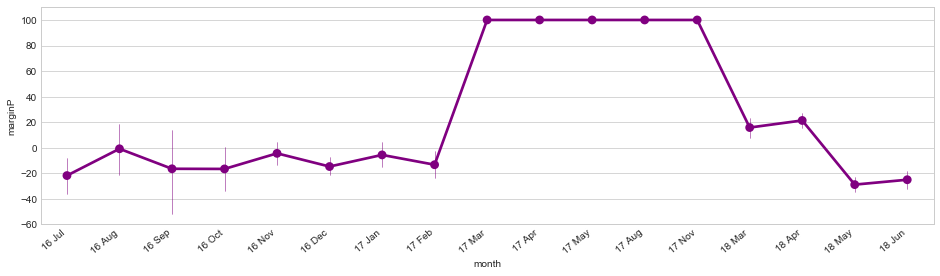

In [22]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="marginP", color="purple", errwidth=.5, data=df_monthly, order=order)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

In [23]:
df_monthly2=df_monthly.drop([0,980,981,982,983,2577,2578])

In [24]:
order2=["16 Jul","16 Aug","16 Sep","16 Oct","16 Nov","16 Dec","17 Jan","17 Feb","18 Mar","18 Apr","18 May","18 Jun"]

Months with less than 5 ads excluded. 

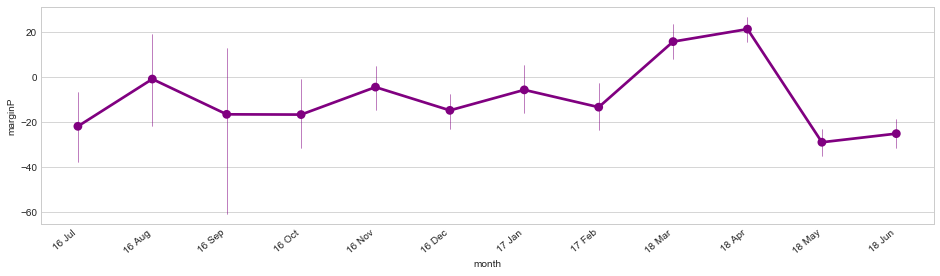

In [25]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="marginP", color="purple", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### CTR

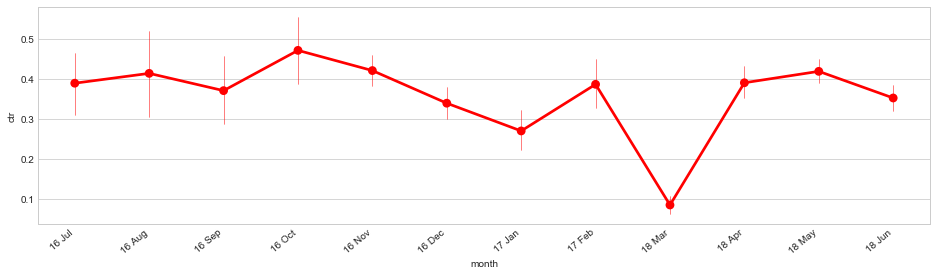

In [26]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="ctr", color="red", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### CPC

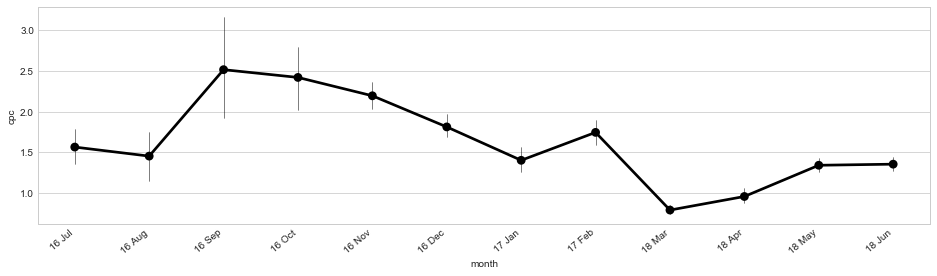

In [27]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="cpc", color="black", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### CPM

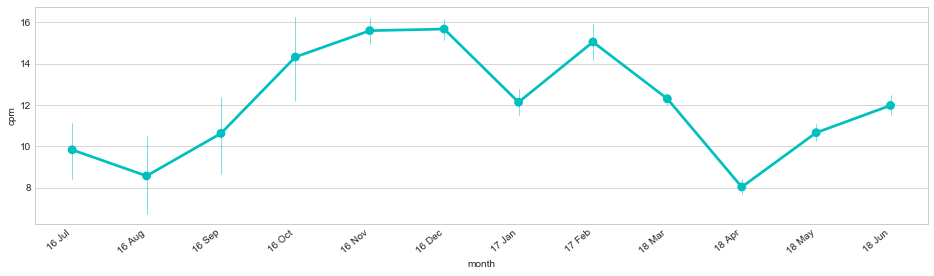

In [28]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="cpm", color="c", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### CR

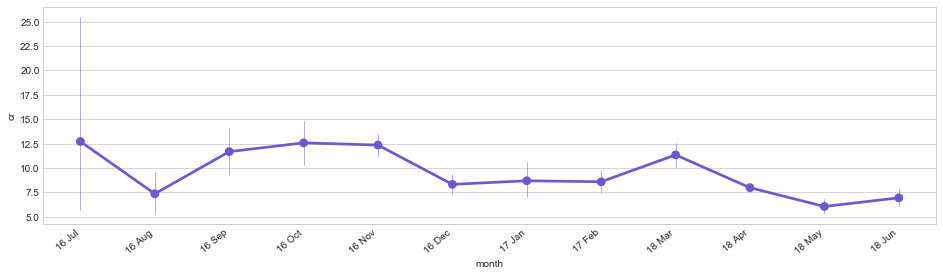

In [29]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="cr", color="slateblue", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

### Leads

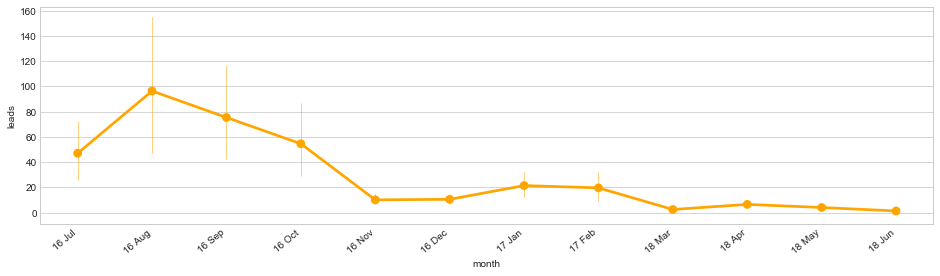

In [30]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="leads", color="orange", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

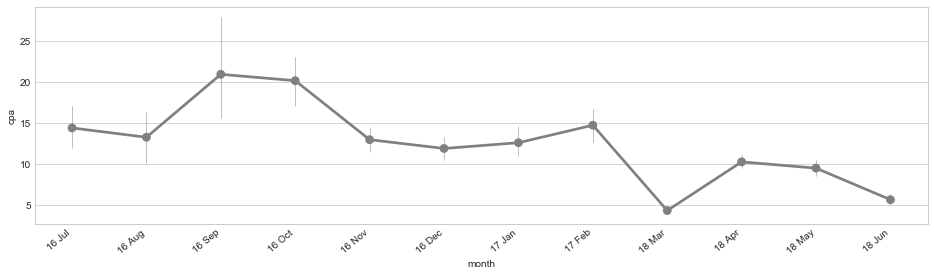

In [31]:
plt.pyplot.figure(figsize=(16,4))
ha=sns.pointplot(x="month", y="cpa", color="grey", errwidth=.5, data=df_monthly2, order=order2)
ha.set_xticklabels(ha.get_xticklabels(), rotation=40, ha="right")
ha

________

# Other Testing

50%+ Top 10 Margins

In [33]:
df_monthly2.loc[df_monthly2["marginP"]>=50].nlargest(10,'margin')

,tag,campaign_name,name,budget,relevance_score,leads,revenue,purchase,margin,ctr,cpc,cpm,cr,cpa,insert_time,frequency,marginP,views,clicks,month
1340,SB000000001034567,GEERS ‚Äì QZ V3 - Algemeen,GH T 1 CT (Winter) EB37 MV50+ ALL LAL 10% CV,150.0,"5,4,3",172,4128.0,1900.66,2227.34,0.0,0.19,1.86,1.7,11.05,2016-12-19 16:20:17,169175385,53.96,1022943,10034,16 Dec
1097,SB000000001035443,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Limbu...,5.0,"5,4,6",26,560.0,137.89,422.11,0.0,0.69,10.74,13.0,5.30,2016-12-22 15:08:08,102472581,75.38,12836,200,17 Jan
1112,SB000000001035488,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Itzehoe,5.0,4,26,546.0,137.87,408.13,0.0,0.83,12.68,15.7,5.30,2016-12-22 15:13:00,103019677,74.75,10870,166,17 Jan
1234,SB000000001027772,GEERS ‚Äì QZ V3 - Steden,GE T 1 CT (Winter) EB 37 MV50+ ALL G-STD1 Wies...,5.0,"6,7,4,5,3",22,516.0,154.77,361.23,0.0,0.74,8.60,10.5,7.04,2016-11-17 10:31:36,141267742,70.01,17988,209,16 Dec
2576,SB000000001039154,GEERS IIC QZ V3 - Algemeen,T 2.3 I SB Nov4 B M/V 50+ D/M RM,6.0,6,25,525.0,166.94,358.06,0.0,0.87,15.77,13.1,6.68,2017-01-20 11:49:43,101286429,68.20,10584,191,17 Feb
184,SB000000001027298,GEERS ‚Äì QZ V3 - Steden,GH T 1CT (Winter) EB37 MV50+ M/D STD1 Neu-Ulm,5.0,0,20,414.0,76.47,337.53,0.0,1.09,16.11,28.6,3.82,2016-11-15 11:50:44,101359375,81.53,4747,70,16 Nov
1089,SB000000001032014,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Stra...,5.0,0,22,462.0,137.85,324.15,0.0,1.08,15.35,17.2,6.27,2016-12-07 10:42:15,103085484,70.16,8983,128,17 Jan
1062,SB000000001031720,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 D√ºss...,5.0,4.6,21,455.0,137.63,317.37,0.0,1.06,11.81,16.2,6.55,2016-12-06 15:50:20,101210000,69.75,11658,130,17 Jan
1156,SB000000001036577,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Kaise...,3.0,0,19,399.0,82.42,316.58,0.0,0.66,10.41,15.3,4.34,2016-12-29 15:08:21,101615161,79.34,7915,124,17 Jan
1380,SB000000001031849,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Lands...,5.0,0,16,384.0,70.01,313.99,0.0,1.11,18.23,25.4,4.38,2016-12-07 08:54:42,101625200,81.77,3840,63,16 Dec


40%+ Top 10 Margin

In [34]:
df_monthly2.loc[df_monthly2["marginP"]>=40].nlargest(10,'margin')

,tag,campaign_name,name,budget,relevance_score,leads,revenue,purchase,margin,ctr,cpc,cpm,cr,cpa,insert_time,frequency,marginP,views,clicks,month
2575,SB000000001036916,GEERS IIC QZ V3 - Algemeen,T 2.3 I SB Nov4 B M/V 50+ ALL,300.0,2.3,692,14532.0,8358.18,6173.82,0.6,0.52,3.06,4.3,12.08,2017-01-03 11:29:24,147735000,42.48,2733763,16042,17 Feb
1168,SB000000001036916,GEERS IIC QZ V3 - Algemeen,T 2.3 I SB Nov4 B M/V 50+ ALL,300.0,"5,4,3,2",498,10458.0,5880.88,4577.12,0.6,0.56,3.36,4.8,11.81,2017-01-03 11:29:24,137618966,43.77,1749363,10445,17 Jan
1335,SB000000001032806,GEERS ‚Äì QZ V3 - Algemeen,GH T 1 CT (Winter) EB37 MV50+ ALL (NiTa),200.0,"5,4,3,2",469,11256.0,6731.43,4524.57,0.3,0.56,1.87,3.9,14.35,2016-12-09 13:47:16,173268261,40.20,3603877,12021,16 Dec
1165,SB000000001030952,GEERS IIC QZ V3 - Algemeen,T 2.4 V SB Nov5 D M/V 50+ M/D LAL 10% CV,200.0,4.5,429,9194.0,5068.29,4125.71,0.0,0.97,14.22,8.2,11.81,2016-12-02 11:35:35,101337419,44.87,356369,5205,17 Jan
1507,SB000000001030952,GEERS IIC QZ V3 - Algemeen,T 2.4 V SB Nov5 D M/V 50+ M/D LAL 10% CV,200.0,"3,4,5,6,7",311,7379.0,4270.48,3108.52,0.0,1.10,18.94,8.0,13.73,2016-12-02 11:35:35,101147333,42.13,225493,3896,16 Dec
1340,SB000000001034567,GEERS ‚Äì QZ V3 - Algemeen,GH T 1 CT (Winter) EB37 MV50+ ALL LAL 10% CV,150.0,"5,4,3",172,4128.0,1900.66,2227.34,0.0,0.19,1.86,1.7,11.05,2016-12-19 16:20:17,169175385,53.96,1022943,10034,16 Dec
1506,SB000000001029596,GEERS IIC QZ V3 - Algemeen,T 2.3 V SB Nov5 C M/V 50+ M/D,75.0,"3,5,4,6,7",197,4607.0,2731.44,1875.56,0.0,1.06,13.23,7.7,13.87,2016-11-24 15:49:55,101106452,40.71,206432,2569,16 Dec
82,SB000000001004351,Geers ‚Äì QZ- V2,GH T SB Maart1 A 60+ RC (NiTa),75.0,"5,7,6,3,2",67,1206.0,703.34,502.66,0.3,0.96,3.29,9.2,10.50,2016-08-08 15:16:00,155148571,41.68,214068,731,16 Oct
1097,SB000000001035443,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Limbu...,5.0,"5,4,6",26,560.0,137.89,422.11,0.0,0.69,10.74,13.0,5.30,2016-12-22 15:08:08,102472581,75.38,12836,200,17 Jan
1112,SB000000001035488,GEERS IIC QZ V3 - Steden,T 2.4 V SB Nov5 D M/V 50+ M/D G-IIC-STD2 Itzehoe,5.0,4,26,546.0,137.87,408.13,0.0,0.83,12.68,15.7,5.30,2016-12-22 15:13:00,103019677,74.75,10870,166,17 Jan


In [1]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>